In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier


import seaborn as sns

In [2]:
df = pd.read_excel('Cleaned_d.xlsx')
df

,PatientID,dmVisitdtYr,dmBirthdtYr,dmGender,dmHeight,dmWeight,dmBmi,dmHF,dmBpm,dmBp1,...,dcQrsD,dcQt,dcLbbb,dcLvh2,dcBaz,dcFri,dcCol,dcHb,dcGl,dcCre
0,952,2012,1941,Male,179.0,90.0,28.1,"Yes, with previous hospitalisation",85.0,150,...,140.0,372.0,Yes,Yes,429.55,409.44,NaN,145.0,NaN,73.0
1,953,2012,1939,Male,173.0,90.0,30.1,"Yes, with previous hospitalisation",69.0,130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1650,2012,1933,Male,175.0,73.0,23.8,No,87.0,120,...,90.0,282.0,No,No,333.67,315.47,NaN,NaN,NaN,NaN
3,1687,2011,1949,Male,NaN,NaN,NaN,"Yes, with previous hospitalisation",NaN,130,...,100.0,250.0,No,Yes,268.10,261.92,NaN,NaN,NaN,NaN
4,2025,2011,1954,Male,161.0,76.0,29.3,"Yes, without previous hospitalisation",60.0,140,...,160.0,250.0,No,Yes,270.03,263.18,3.3,107.0,5.6,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,28243,2017,1937,Female,165.0,92.0,33.8,"Yes, with previous hospitalisation",140.0,140,...,80.0,349.0,No,No,450.56,413.79,NaN,113.0,10.7,82.0
636,28244,2017,1930,Male,166.0,60.0,21.8,"Yes, with previous hospitalisation",150.0,160,...,81.0,397.0,No,No,386.95,390.27,NaN,127.0,8.8,100.0
637,28247,2017,1935,Female,157.0,70.0,28.4,"Yes, without previous hospitalisation",68.0,150,...,84.0,417.0,No,Yes,440.65,432.62,NaN,NaN,6.7,163.0
638,28413,2017,1959,Female,164.0,78.0,29.0,"Yes, with previous hospitalisation",60.0,100,...,80.0,388.0,No,No,425.03,412.31,6.4,135.0,4.8,79.0


In [4]:
df.shape

(641, 58)

In [6]:
df['dmHF'].unique()

array([1, 0], dtype=int64)

In [22]:
#len(df['dmHF'])
#df['dmHF'].not


641

In [3]:
df['dmHF']= df['dmHF'].map({
    'Yes, with previous hospitalisation':1,
    'Yes, without previous hospitalisation':1,
    'No':0
})

In [4]:
df['dmHF'] = df['dmHF'].astype(int)
df['dmHF'].unique()


array([1, 0])

In [22]:
df.head(10)

,PatientID,dmVisitdtYr,dmBirthdtYr,dmGender,dmHeight,dmWeight,dmBmi,dmHF,dmBpm,dmBp1,...,dcQrsD,dcQt,dcLbbb,dcLvh2,dcBaz,dcFri,dcCol,dcHb,dcGl,dcCre
0,952,2012,1941,Male,179.0,90.0,28.1,1,85.0,150,...,140.0,372.0,Yes,Yes,429.55,409.44,NaN,145.0,NaN,73.0
1,953,2012,1939,Male,173.0,90.0,30.1,1,69.0,130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1650,2012,1933,Male,175.0,73.0,23.8,0,87.0,120,...,90.0,282.0,No,No,333.67,315.47,NaN,NaN,NaN,NaN
3,1687,2011,1949,Male,NaN,NaN,NaN,1,NaN,130,...,100.0,250.0,No,Yes,268.10,261.92,NaN,NaN,NaN,NaN
4,2025,2011,1954,Male,161.0,76.0,29.3,1,60.0,140,...,160.0,250.0,No,Yes,270.03,263.18,3.3,107.0,5.6,220.0
5,2109,2011,1932,Male,171.0,69.0,23.6,1,150.0,110,...,80.0,320.0,No,No,505.96,434.31,NaN,133.0,8.9,104.0
6,2115,2011,1935,Male,171.0,87.0,29.8,1,150.0,130,...,80.0,320.0,No,Yes,505.96,434.31,NaN,NaN,NaN,NaN
7,2116,2011,1931,Male,175.0,76.0,24.8,1,90.0,135,...,80.0,320.0,No,Yes,357.77,344.71,NaN,135.0,7.1,123.0
8,2121,2011,1952,Male,181.0,100.0,30.5,1,66.0,110,...,80.0,400.0,No,No,435.12,423.09,NaN,101.0,3.8,92.0
9,2122,2011,1937,Male,170.0,93.0,32.2,0,110.0,170,...,80.0,320.0,No,Yes,446.86,399.79,3.6,134.0,10.1,89.0


In [11]:
df.info()
#feature_to_keep_columns = ['']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientID     640 non-null    int64  
 1   dmVisitdtYr   640 non-null    int64  
 2   dmBirthdtYr   640 non-null    int64  
 3   dmGender      639 non-null    object 
 4   dmHeight      635 non-null    float64
 5   dmWeight      635 non-null    float64
 6   dmBmi         635 non-null    float64
 7   dmHF          640 non-null    int64  
 8   dmBpm         639 non-null    float64
 9   dmBp1         640 non-null    int64  
 10  dmBp2         640 non-null    int64  
 11  dmEtio        640 non-null    object 
 12  dmSmoking     635 non-null    object 
 13  dmDiab        639 non-null    object 
 14  dmDiabd       248 non-null    object 
 15  dmAlc         636 non-null    object 
 16  dmPhya        452 non-null    object 
 17  dmHT          639 non-null    object 
 18  hsAdm         638 non-null    

In [5]:
feature_columns = df.select_dtypes(include='float64').columns

numeric_df = df[feature_columns.tolist() + ['dmHF']]

#numeric_df = numeric_df.dropna()

X = numeric_df[feature_columns]
Y= numeric_df['dmHF']


In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 4 to 630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dmHeight  343 non-null    float64
 1   dmWeight  343 non-null    float64
 2   dmBmi     343 non-null    float64
 3   dmBpm     343 non-null    float64
 4   hsWbc     343 non-null    float64
 5   hsCol     343 non-null    float64
 6   hsHb      343 non-null    float64
 7   hsGl      343 non-null    float64
 8   hsCre     343 non-null    float64
 9   hsUre     343 non-null    float64
 10  hsSod     343 non-null    float64
 11  hsUrc     343 non-null    float64
 12  hsPot     343 non-null    float64
 13  hsBili    343 non-null    float64
 14  dcBp1     343 non-null    float64
 15  dcBp2     343 non-null    float64
 16  dcBpm     343 non-null    float64
 17  dcHr2     343 non-null    float64
 18  dcQrsD    343 non-null    float64
 19  dcQt      343 non-null    float64
 20  dcBaz     343 non-null    float64
 21

In [66]:
Y.unique()

array([1, 0])

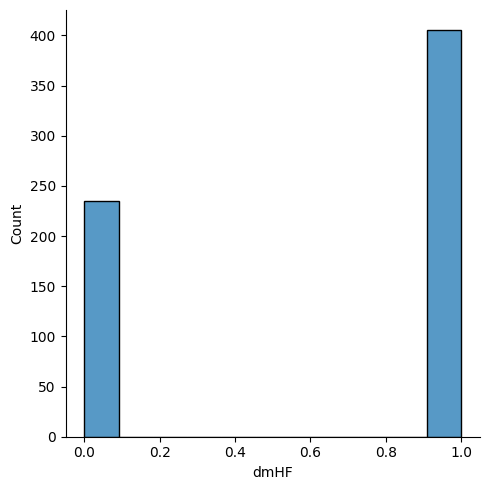

In [6]:
sns.displot(data=df,x='dmHF')

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [8]:
len(X_train)

512

In [70]:
# KNN algorithm
knn_classiffier = KNeighborsClassifier(n_neighbors=5)
knn_classiffier.fit(X_train,Y_train)


KNeighborsClassifier()

[[14 18]
 [ 8 29]]


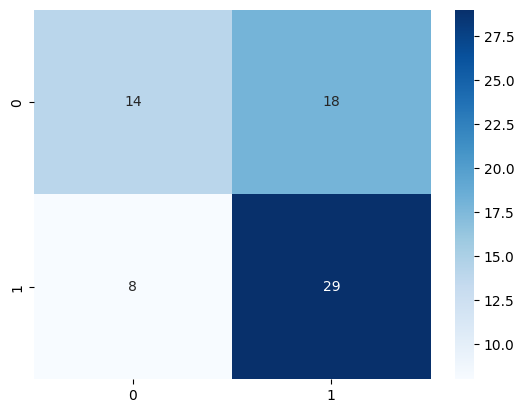

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        32
           1       0.62      0.78      0.69        37

    accuracy                           0.62        69
   macro avg       0.63      0.61      0.60        69
weighted avg       0.63      0.62      0.61        69



In [74]:
#knn_prediction = knn_classiffier.predict(X_test)
#print(confusion_matrix(Y_test, knn_prediction))
#print(classification_report(Y_test, knn_prediction))

matrix = confusion_matrix(Y_test, knn_prediction)
print(matrix)

ax1 = sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()
print(classification_report(Y_test, knn_prediction))


In [11]:
randforst_cls= RandomForestClassifier(n_estimators=100, random_state=42)
randforst_cls.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

[[17 26]
 [19 66]]
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        43
           1       0.72      0.78      0.75        85

    accuracy                           0.65       128
   macro avg       0.59      0.59      0.59       128
weighted avg       0.64      0.65      0.64       128



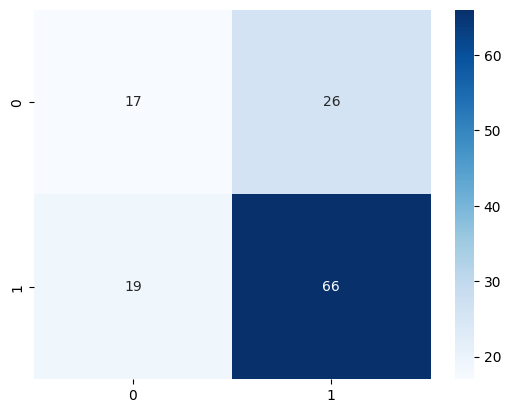

In [12]:
randfor_predictions = randforst_cls.predict(X_test)

#print('Accuracy score: ' + accuracy_score(Y_test,randfor_predictions))

matrix1 = confusion_matrix(Y_test,randfor_predictions)
print(matrix1)
ax2 = sns.heatmap(matrix1, annot=True, cmap='Blues')
print(classification_report(Y_test,randfor_predictions))

